In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import jit,njit,float64,int32
import numba as nb
import pandas as pd
from derivative import dxdt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

from derivative import dxdt
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt



# FIT SWE

In [11]:
with open('Mx_1x10/SWE.Mx_1x10.txt', 'r') as file:
    # Lee la primera línea (encabezado) y divídela en una lista
    header = file.readline().strip().split()

    # Inicializa listas vacías para almacenar los datos
    years = []
    ages = []
    females = []
    males = []
    totals = []

    row_count = 0
    for line in file:
        row_count += 1
        if row_count == 1:
            continue
        if row_count == 2:
            continue

        data = line.strip().split()
        years.append((data[0]))

        if data[1] == "110+":
            ages.append(110)
        else:
            ages.append(float(data[1]))
        if data[2] == ".":
            females.append(0)
        else:
            females.append(float(data[2]))
        if data[3] == ".":
            males.append(0)
        else:
            males.append(float(data[3]))
        if data[4] == ".":
            totals.append(0)
        else:
            totals.append(float(data[4]))
years = np.array(years)
ages = np.array(ages)
females = np.array(females)
males = np.array(males)
totals = np.array(totals)


years_of_interes = ["1751-1759", "1760-1769", "1770-1779", "1780-1789", "1790-1799", "1800-1809", "1810-1819", "1820-1829", "1830-1839", "1840-1849", "1850-1859", "1860-1869", "1870-1879", "1880-1889", "1890-1899", "1900-1909" ,"1910-1919", "1920-1929","1930-1939" , "1940-1949","1950-1959", "1960-1969", "1970-1979","1980-1989", "1990-1999", "2000-2009", "2010-2019", "2020-2022"]

datos_generales = {}
datos_generales["Ages"] = ages[0:100]
for specific_year in years_of_interes:
    posicion_inicial = np.where(years == specific_year)[0][0]
    
    death_rate = totals[posicion_inicial:posicion_inicial+100]
    datos_generales[specific_year] = death_rate

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.e**(b * x) 

In [5]:
R_parameter_gompertz_law_40_60 = []
R_parameter_gompertz_law_60_80 = []

betas_gompertz_law_40_60 = []
betas_gompertz_law_60_80 = []


for year in years_of_interes:
    edad_40_60 = datos_generales["Ages"][40:60]
    data_40_60 = datos_generales[year][40:60]
    popt_40_60, pcov_40_60 = curve_fit(func, edad_40_60, data_40_60, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_40_60.append(popt_40_60[0])
    betas_gompertz_law_40_60.append(popt_40_60[1])

    edad_60_80 = datos_generales["Ages"][60:80]
    data_60_80 = datos_generales[year][60:80]
    popt_60_80, pcov_60_80 = curve_fit(func, edad_60_80, data_60_80, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_60_80.append(popt_60_80[0])
    betas_gompertz_law_60_80.append(popt_60_80[1])

In [6]:
distancia_euclidea_Strehler_Mildvan_correlation = []
for i in range(len(betas_gompertz_law_60_80)):
    distancia = np.sqrt((betas_gompertz_law_60_80[i] - betas_gompertz_law_40_60[i] )**2 + (R_parameter_gompertz_law_60_80[i]-R_parameter_gompertz_law_40_60[i])**2)
    distancia_euclidea_Strehler_Mildvan_correlation.append(distancia)

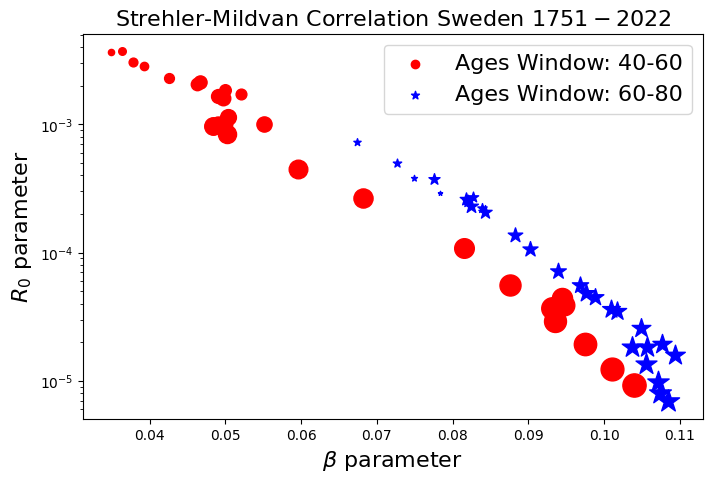

In [7]:
plt.figure(figsize = (8,5))
plt.title(rf"Strehler-Mildvan Correlation Sweden $1751-2022$" , fontsize = 16)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$R_0$ parameter", fontsize = 16)
marker_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290]

# Crear un scatter plot con colores diferentes para cada pareja de puntos
for i in range(len(betas_gompertz_law_40_60)):
    plt.scatter(betas_gompertz_law_40_60[i], R_parameter_gompertz_law_40_60[i], color="red", s=marker_sizes[i])
    plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',s=marker_sizes[i])
plt.scatter(betas_gompertz_law_40_60[0], R_parameter_gompertz_law_40_60[0], color="red",label = "Ages Window: 40-60")
plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',label = "Ages Window: 60-80")
plt.yscale("log")
plt.legend(fontsize = 16)
#plt.savefig("Strehler_Mildvan_correlation_SWE.jpg", dpi = 1000)

In [19]:
R_parameter_gompertz_law_40_60 = []
R_parameter_gompertz_law_60_80 = []

betas_gompertz_law_40_60 = []
betas_gompertz_law_60_80 = []


for year in years_of_interes:
    betas_40_60 = []
    R_values_40_60 = []
    edad_40_60 = datos_generales["Ages"][40:60]
    data_40_60 = datos_generales[year][40:60]

    Cubic_data = CubicSpline(edad_40_60, data_40_60, bc_type='natural')
    edad_40_60 = np.linspace(40,60,100)
    Spline_data_40_60 = Cubic_data(edad_40_60)
    


    derivative_process = dxdt(Spline_data_40_60, edad_40_60, kind="finite_difference", k=1)
    beta_values = derivative_process/Spline_data_40_60
    R_values = Spline_data_40_60/np.e**(beta_values*edad_40_60)
    betas_40_60.append(beta_values)
    R_values_40_60.append(R_values)


    betas_60_80 = []
    R_values_60_80 = []
    edad_60_80 = datos_generales["Ages"][60:80]
    data_60_80 = datos_generales[year][60:80]

    Cubic_data = CubicSpline(edad_60_80, data_60_80, bc_type='natural')
    edad_60_80 = np.linspace(60,80,100)
    Spline_data_60_80 = Cubic_data(edad_60_80)
    
    

    derivative_process = dxdt(Spline_data_60_80, edad_60_80, kind="finite_difference", k=1)
    beta_values = derivative_process/Spline_data_60_80
    R_values = Spline_data_60_80/np.e**(beta_values*edad_60_80)
    betas_60_80.append(beta_values)
    R_values_60_80.append(R_values)


    R_parameter_gompertz_law_40_60.append(R_values_40_60)
    R_parameter_gompertz_law_60_80.append(R_values_60_80)

    betas_gompertz_law_40_60.append(betas_40_60)
    betas_gompertz_law_60_80.append(betas_60_80)


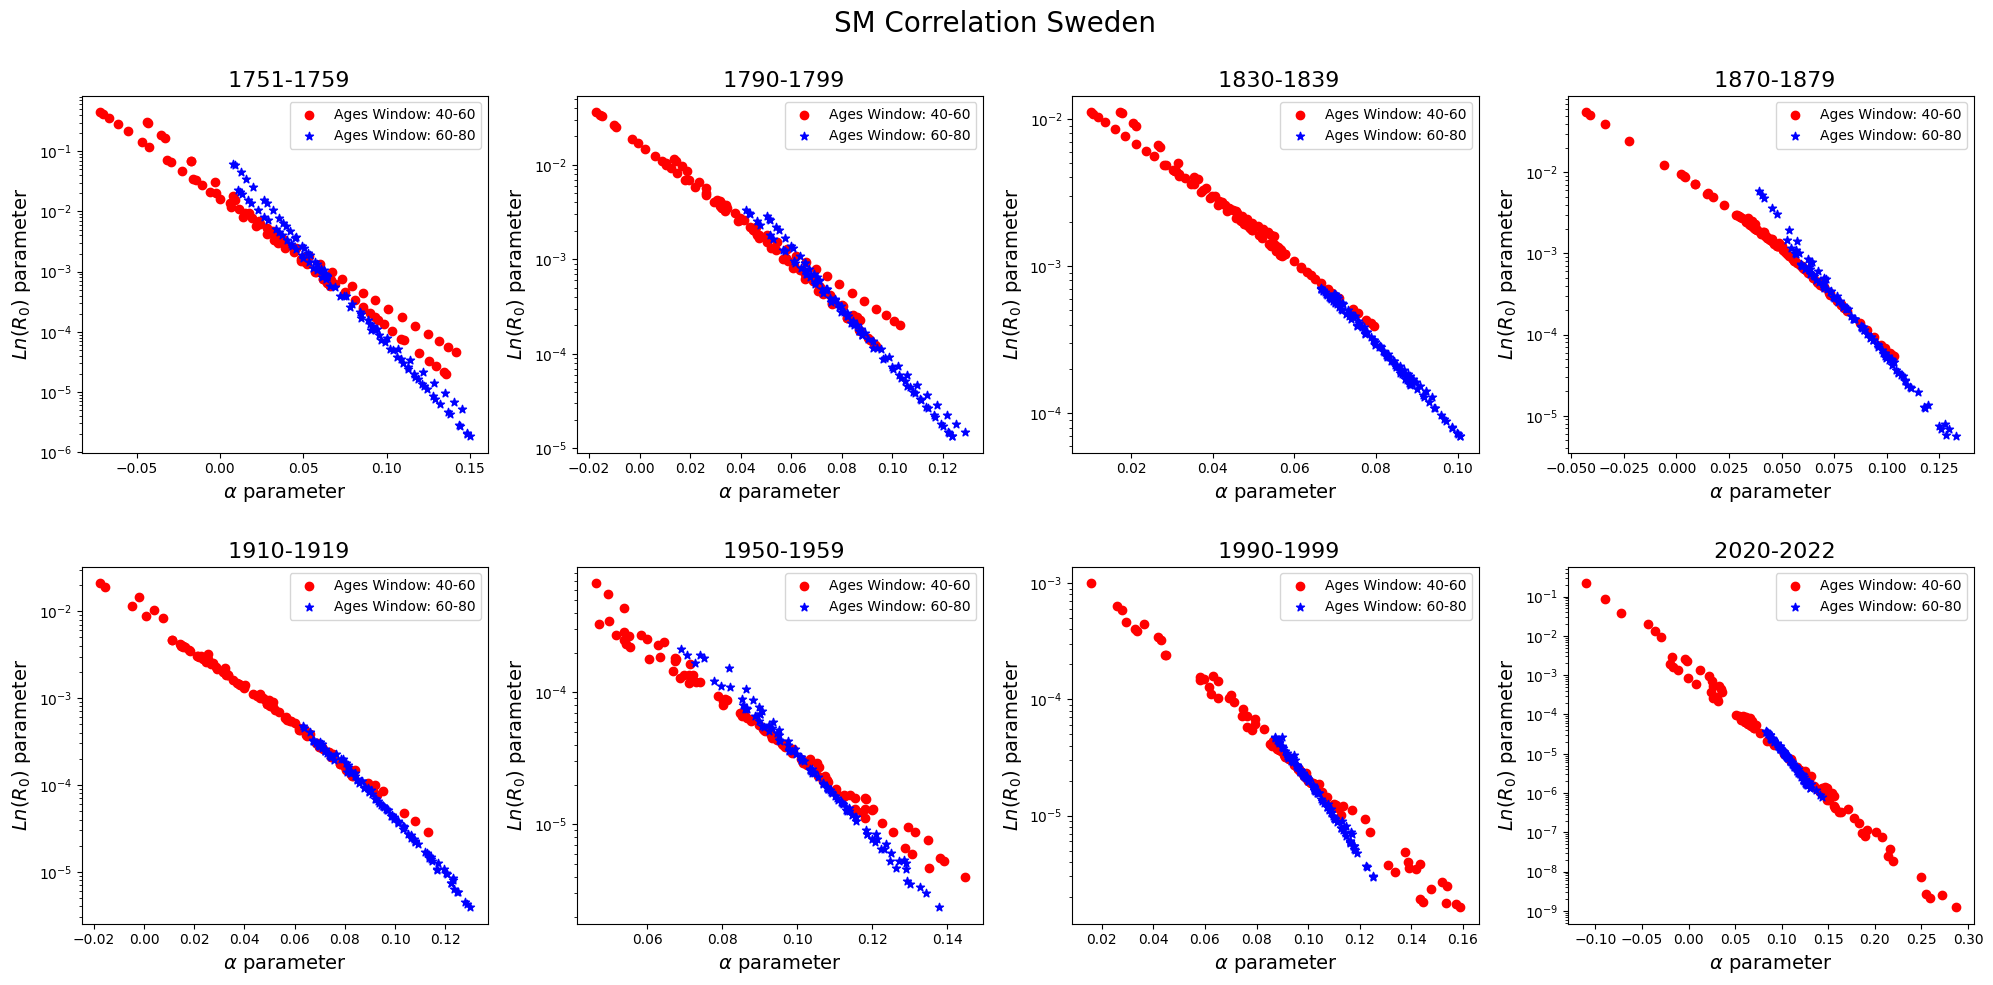

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Creating subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Plotting the data on subplots
fig.suptitle(r"SM Correlation Sweden", fontsize = 20)
contador = 0
valores = [0, 4, 8, 12, 16, 20, 24, 27]
for i in range(0,2):
    for j in range(0,4):
        
        axs[i, j].scatter(betas_gompertz_law_40_60[valores[contador]], R_parameter_gompertz_law_40_60[valores[contador]], color="red",label = "Ages Window: 40-60")
        axs[i, j].scatter(betas_gompertz_law_60_80[valores[contador]], R_parameter_gompertz_law_60_80[valores[contador]], color= "blue", marker='*',label = "Ages Window: 60-80")
        axs[i, j].set_title(f" \n {years_of_interes[valores[contador]]}", fontsize = 16)
        axs[i, j].set_xlabel(r"$\alpha$ parameter", fontsize = 14)
        axs[i, j].set_ylabel(r"$Ln(R_0)$ parameter", fontsize = 14)
        axs[i, j].set_yscale("log")
        axs[i, j].legend()
        contador += 1

plt.tight_layout()
plt.savefig("SM_Correlation_Sweden_CubicSplines.jpg", dpi = 1000)
plt.show()

In [43]:
beta = betas_gompertz_law_40_60[-1]
beta_2 = betas_gompertz_law_60_80[-1]
print(beta)
print(beta_2)

beta_general = (beta+beta_2)/2
R = R_parameter_gompertz_law_40_60[-1]
R_2 = R_parameter_gompertz_law_60_80[-1]

R_general = (R + R_2)/2

0.10393280687439053
0.10848166808118043


In [41]:
tiempo = np.linspace(40,80,1000)

In [44]:
datos_fit = R_general*np.e**(beta_general*tiempo)

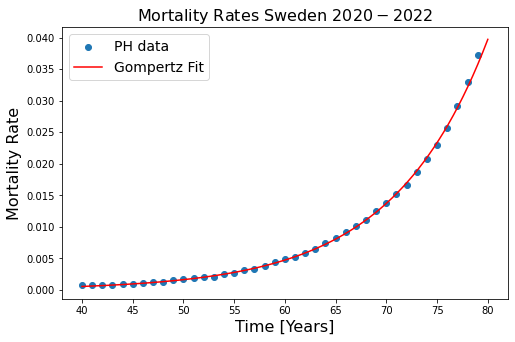

In [56]:
plt.figure(figsize=(8,5))
plt.title(r"Mortality Rates Sweden $2020-2022$" , fontsize = 16)
plt.xlabel(r"Time [Years]", fontsize = 16)
plt.ylabel(r"Mortality Rate", fontsize = 16)

zoom_ventana1 = [30, 62]  # Límites en el eje x para la primera ventana
zoom_ventana2 = [60, 85]  # Límites en el eje x para la segunda ventana


plt.scatter(datos_generales["Ages"][40:80], datos_generales["2020-2022"][40:80], label = "PH data")
plt.plot(tiempo, datos_fit, label = "Gompertz Fit", color = "red")
plt.legend(fontsize = 14)
#plt.yscale("log")


plt.savefig("mortality_curve_Fit_Gompertz_law.jpg", dpi = 500)

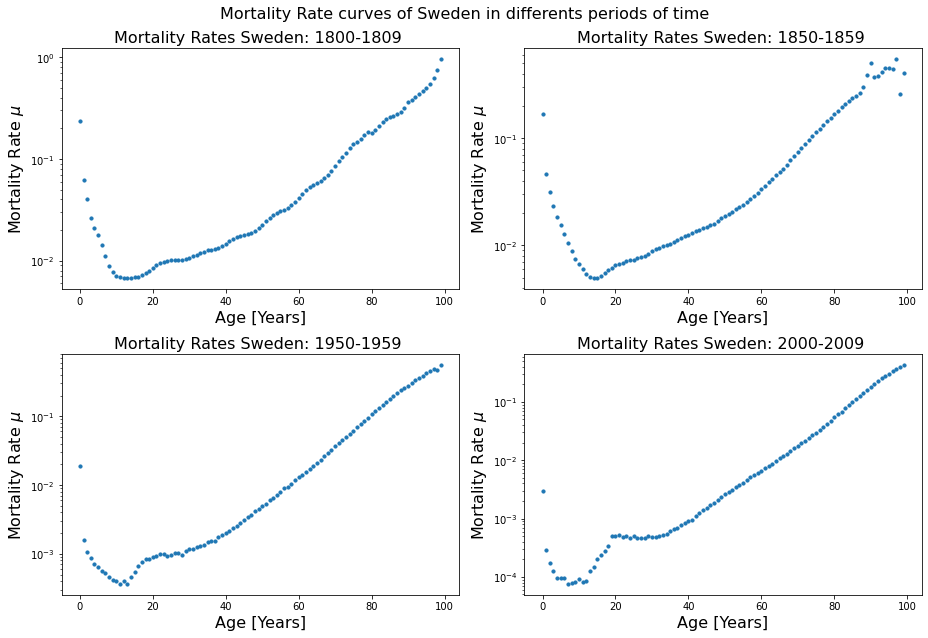

In [69]:
# Crear el subplot con 2 filas y 2 columnas
plt.figure(figsize=(13,9))
plt.suptitle(r"Mortality Rate curves of Sweden in differents periods of time", fontsize= 16)

sizes = [10]
markers = ["*", "+", "v", "o"]


years_of_interes = ["1751-1759", "1760-1769", "1770-1779", "1780-1789", "1790-1799", "1800-1809", "1810-1819", "1820-1829", "1830-1839", "1840-1849", "1850-1859", "1860-1869", "1870-1879", "1880-1889", "1890-1899", "1900-1909" ,"1910-1919", "1920-1929","1930-1939" , "1940-1949","1950-1959", "1960-1969", "1970-1979","1980-1989", "1990-1999", "2000-2009", "2010-2019", "2020-2022"]


plt.subplot(2, 2, 1)
plt.scatter(datos_generales["Ages"][0:100], datos_generales[years_of_interes[5]][0:100], s = sizes[0]) 
plt.title(fr'Mortality Rates Sweden: {years_of_interes[5]} ', fontsize = 16)
#plt.xlim(0.18, 0.85)
plt.yscale("log")
#plt.xlim(0.199, 0.206)
plt.xlabel(r"Age [Years]", fontsize = 16)
plt.ylabel(r"Mortality Rate $\mu$", fontsize = 16)


plt.subplot(2, 2, 2)
plt.scatter(datos_generales["Ages"][0:100], datos_generales[years_of_interes[10]][0:100], s = sizes[0]) 
plt.title(fr'Mortality Rates Sweden: {years_of_interes[10]} ', fontsize = 16)
#plt.xlim(0.18, 0.85)
plt.yscale("log")
#plt.xlim(0.199, 0.206)
plt.xlabel(r"Age [Years]", fontsize = 16)
plt.ylabel(r"Mortality Rate $\mu$", fontsize = 16)


plt.subplot(2, 2, 3)
plt.scatter(datos_generales["Ages"][0:100], datos_generales[years_of_interes[20]][0:100], s = sizes[0]) 
plt.title(fr'Mortality Rates Sweden: {years_of_interes[20]} ', fontsize = 16)
#plt.xlim(0.18, 0.85)
plt.yscale("log")
#plt.xlim(0.199, 0.206)
plt.xlabel(r"Age [Years]", fontsize = 16)
plt.ylabel(r"Mortality Rate $\mu$", fontsize = 16)


plt.subplot(2, 2, 4)
plt.scatter(datos_generales["Ages"][0:100], datos_generales[years_of_interes[25]][0:100], s = sizes[0]) 
plt.title(fr'Mortality Rates Sweden: {years_of_interes[25]} ', fontsize = 16)
#plt.xlim(0.18, 0.22)
plt.yscale("log")
#plt.xlim(0.199, 0.206)
plt.xlabel(r"Age [Years]", fontsize = 16)
plt.ylabel(r"Mortality Rate $\mu$", fontsize = 16)

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.savefig("Mortalities_Rates_Sweden_differents_years.jpg", dpi = 1000)

# FIT CHE Switerzland

In [23]:
with open('Mx_1x10/CHE.Mx_1x10.txt', 'r') as file:
    # Lee la primera línea (encabezado) y divídela en una lista
    header = file.readline().strip().split()

    # Inicializa listas vacías para almacenar los datos
    years = []
    ages = []
    females = []
    males = []
    totals = []

    row_count = 0
    for line in file:
        row_count += 1
        if row_count == 1:
            continue
        if row_count == 2:
            continue

        data = line.strip().split()
        years.append((data[0]))

        if data[1] == "110+":
            ages.append(110)
        else:
            ages.append(float(data[1]))
        if data[2] == ".":
            females.append(0)
        else:
            females.append(float(data[2]))
        if data[3] == ".":
            males.append(0)
        else:
            males.append(float(data[3]))
        if data[4] == ".":
            totals.append(0)
        else:
            totals.append(float(data[4]))
years = np.array(years)
ages = np.array(ages)
females = np.array(females)
males = np.array(males)
totals = np.array(totals)


years_of_interes = ["1876-1879", "1880-1889", "1890-1899", "1900-1909" ,"1910-1919", "1920-1929","1930-1939" , "1940-1949","1950-1959", "1960-1969", "1970-1979","1980-1989", "1990-1999", "2000-2009", "2010-2019", "2020-2021"]

datos_generales = {}
datos_generales["Ages"] = ages[0:100]
for specific_year in years_of_interes:
    posicion_inicial = np.where(years == specific_year)[0][0]
    
    death_rate = totals[posicion_inicial:posicion_inicial+100]
    datos_generales[specific_year] = death_rate

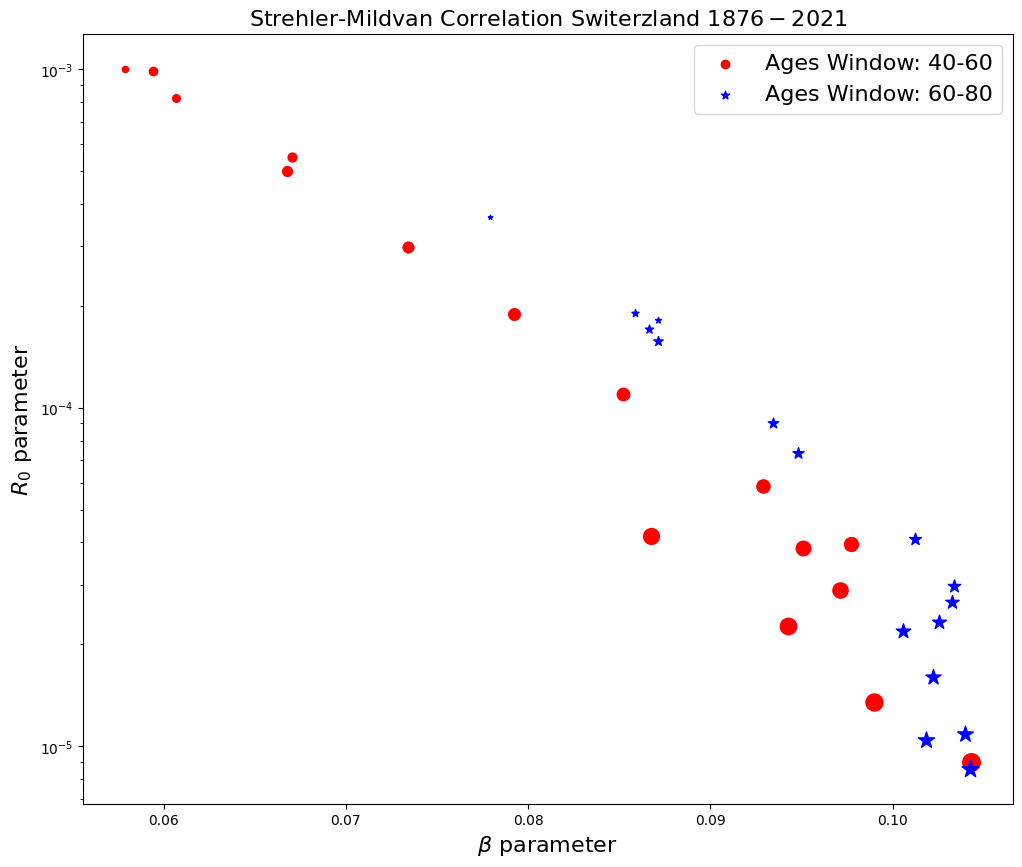

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.e**(b * x) 

R_parameter_gompertz_law_40_60 = []
R_parameter_gompertz_law_60_80 = []

betas_gompertz_law_40_60 = []
betas_gompertz_law_60_80 = []


for year in years_of_interes:
    edad_40_60 = datos_generales["Ages"][40:60]
    data_40_60 = datos_generales[year][40:60]
    popt_40_60, pcov_40_60 = curve_fit(func, edad_40_60, data_40_60, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_40_60.append(popt_40_60[0])
    betas_gompertz_law_40_60.append(popt_40_60[1])

    edad_60_80 = datos_generales["Ages"][60:80]
    data_60_80 = datos_generales[year][60:80]
    popt_60_80, pcov_60_80 = curve_fit(func, edad_60_80, data_60_80, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_60_80.append(popt_60_80[0])
    betas_gompertz_law_60_80.append(popt_60_80[1])

plt.figure(figsize = (12,10))
plt.title(fr"Strehler-Mildvan Correlation Switerzland $1876-2021$" , fontsize = 16)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$R_0$ parameter", fontsize = 16)
marker_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]

# Crear un scatter plot con colores diferentes para cada pareja de puntos
for i in range(len(betas_gompertz_law_40_60)):
    plt.scatter(betas_gompertz_law_40_60[i], R_parameter_gompertz_law_40_60[i], color="red", s=marker_sizes[i])
    plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',s=marker_sizes[i])
plt.scatter(betas_gompertz_law_40_60[0], R_parameter_gompertz_law_40_60[0], color="red",label = "Ages Window: 40-60")
plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',label = "Ages Window: 60-80")
plt.yscale("log")
plt.legend(fontsize = 16)
#plt.savefig("Strehler_Mildvan_correlation_Switerzland.jpg", dpi = 500)

In [36]:
R_parameter_gompertz_law_40_60 = []
R_parameter_gompertz_law_60_80 = []

betas_gompertz_law_40_60 = []
betas_gompertz_law_60_80 = []


for year in years_of_interes:
    betas_40_60 = []
    R_values_40_60 = []
    edad_40_60 = datos_generales["Ages"][40:60]
    data_40_60 = datos_generales[year][40:60]

    Cubic_data = CubicSpline(edad_40_60, data_40_60, bc_type='natural')
    #edad_40_60 = np.linspace(40,60,100)
    Spline_data_40_60 = Cubic_data(edad_40_60)
    


    derivative_process = dxdt(Spline_data_40_60, edad_40_60, kind="finite_difference", k=1)
    beta_values = derivative_process/Spline_data_40_60
    R_values = Spline_data_40_60/np.e**(beta_values*edad_40_60)
    betas_40_60.append(beta_values)
    R_values_40_60.append(R_values)


    betas_60_80 = []
    R_values_60_80 = []
    edad_60_80 = datos_generales["Ages"][60:80]
    data_60_80 = datos_generales[year][60:80]

    Cubic_data = CubicSpline(edad_60_80, data_60_80, bc_type='natural')
    #edad_60_80 = np.linspace(60,80,100)
    Spline_data_60_80 = Cubic_data(edad_60_80)
    
    

    derivative_process = dxdt(Spline_data_60_80, edad_60_80, kind="finite_difference", k=1)
    beta_values = derivative_process/Spline_data_60_80
    R_values = Spline_data_60_80/np.e**(beta_values*edad_60_80)
    betas_60_80.append(beta_values)
    R_values_60_80.append(R_values)


    R_parameter_gompertz_law_40_60.append(R_values_40_60)
    R_parameter_gompertz_law_60_80.append(R_values_60_80)

    betas_gompertz_law_40_60.append(betas_40_60)
    betas_gompertz_law_60_80.append(betas_60_80)


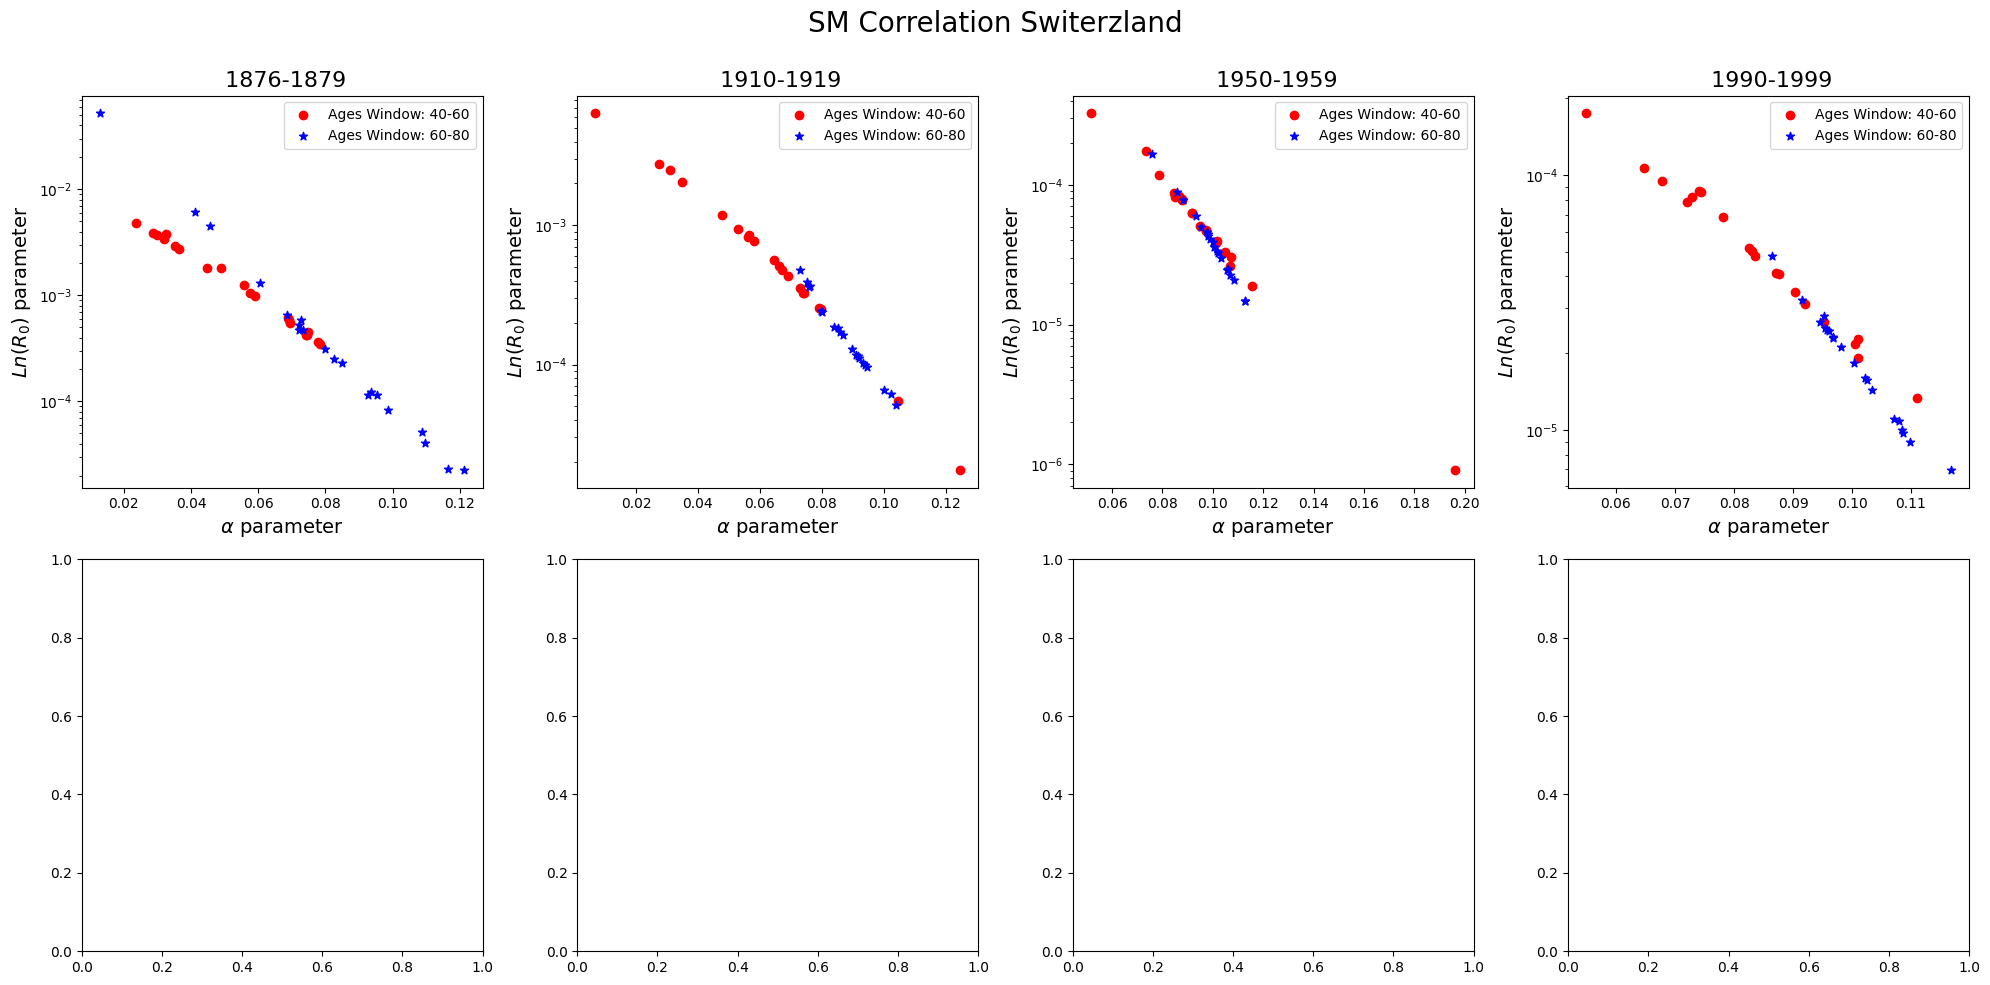

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Creating subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Plotting the data on subplots
fig.suptitle(r"SM Correlation Switerzland", fontsize = 20)
contador = 0
valores = [0, 4, 8, 12]
for i in range(0,1):
    for j in range(0,4):
        
        axs[i, j].scatter(betas_gompertz_law_40_60[valores[contador]], R_parameter_gompertz_law_40_60[valores[contador]], color="red",label = "Ages Window: 40-60")
        axs[i, j].scatter(betas_gompertz_law_60_80[valores[contador]], R_parameter_gompertz_law_60_80[valores[contador]], color= "blue", marker='*',label = "Ages Window: 60-80")
        axs[i, j].set_title(f" \n {years_of_interes[valores[contador]]}", fontsize = 16)
        axs[i, j].set_xlabel(r"$\alpha$ parameter", fontsize = 14)
        axs[i, j].set_ylabel(r"$Ln(R_0)$ parameter", fontsize = 14)
        axs[i, j].set_yscale("log")
        axs[i, j].legend()
        contador += 1

plt.tight_layout()
plt.savefig("SM_Correlation_Switerzland.jpg", dpi = 1000)
plt.show()

# FIT DNK Denmark

In [38]:
with open('Mx_1x10/DNK.Mx_1x10.txt', 'r') as file:
    # Lee la primera línea (encabezado) y divídela en una lista
    header = file.readline().strip().split()

    # Inicializa listas vacías para almacenar los datos
    years = []
    ages = []
    females = []
    males = []
    totals = []

    row_count = 0
    for line in file:
        row_count += 1
        if row_count == 1:
            continue
        if row_count == 2:
            continue

        data = line.strip().split()
        years.append((data[0]))

        if data[1] == "110+":
            ages.append(110)
        else:
            ages.append(float(data[1]))
        if data[2] == ".":
            females.append(0)
        else:
            females.append(float(data[2]))
        if data[3] == ".":
            males.append(0)
        else:
            males.append(float(data[3]))
        if data[4] == ".":
            totals.append(0)
        else:
            totals.append(float(data[4]))
years = np.array(years)
ages = np.array(ages)
females = np.array(females)
males = np.array(males)
totals = np.array(totals)


years_of_interes = ["1835-1839", "1840-1849","1850-1859", "1860-1869", "1870-1879", "1880-1889", "1890-1899", "1900-1909" ,"1910-1919", "1920-1929","1930-1939" , "1940-1949","1950-1959", "1960-1969", "1970-1979","1980-1989", "1990-1999", "2000-2009", "2010-2019", "2020-2022"]

datos_generales = {}
datos_generales["Ages"] = ages[0:100]
for specific_year in years_of_interes:
    posicion_inicial = np.where(years == specific_year)[0][0]
    death_rate = totals[posicion_inicial:posicion_inicial+100]
    datos_generales[specific_year] = death_rate

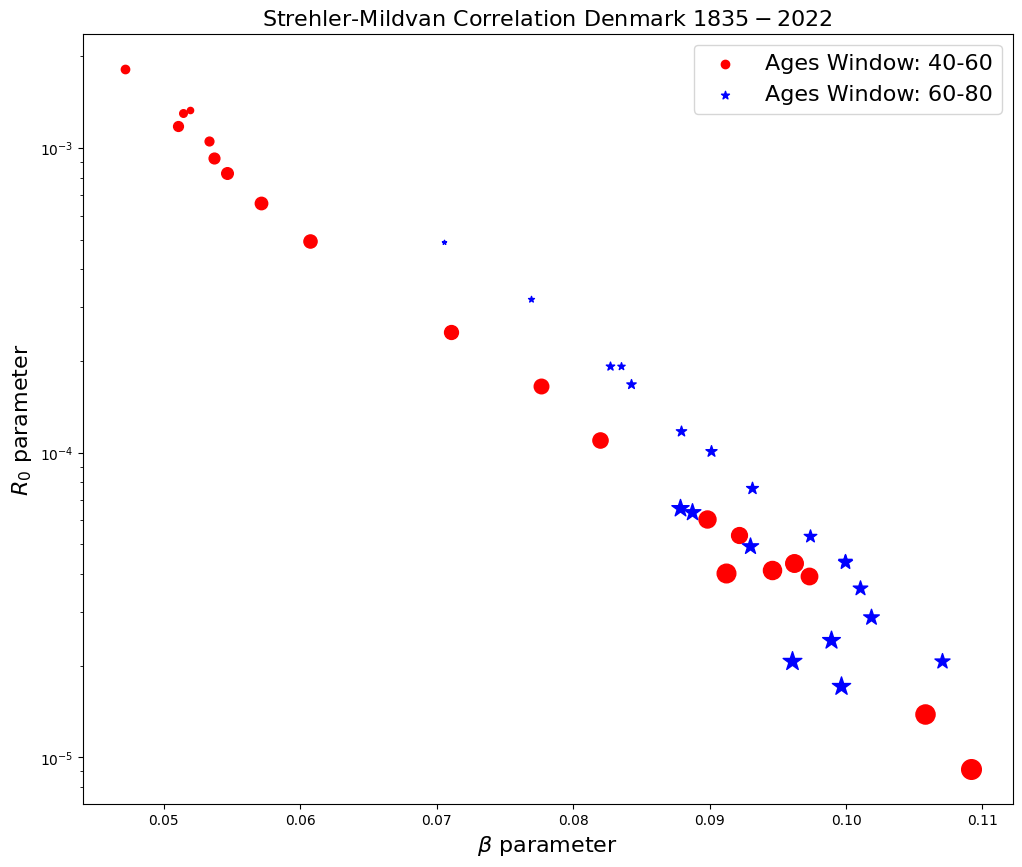

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.e**(b * x) 

R_parameter_gompertz_law_40_60 = []
R_parameter_gompertz_law_60_80 = []

betas_gompertz_law_40_60 = []
betas_gompertz_law_60_80 = []


for year in years_of_interes:
    edad_40_60 = datos_generales["Ages"][40:60]
    data_40_60 = datos_generales[year][40:60]
    popt_40_60, pcov_40_60 = curve_fit(func, edad_40_60, data_40_60, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_40_60.append(popt_40_60[0])
    betas_gompertz_law_40_60.append(popt_40_60[1])

    edad_60_80 = datos_generales["Ages"][60:80]
    data_60_80 = datos_generales[year][60:80]
    popt_60_80, pcov_60_80 = curve_fit(func, edad_60_80, data_60_80, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_60_80.append(popt_60_80[0])
    betas_gompertz_law_60_80.append(popt_60_80[1])

plt.figure(figsize = (12,10))
plt.title(fr"Strehler-Mildvan Correlation Denmark $1835-2022$" , fontsize = 16)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$R_0$ parameter", fontsize = 16)
marker_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230]

# Crear un scatter plot con colores diferentes para cada pareja de puntos
for i in range(len(betas_gompertz_law_40_60)):
    plt.scatter(betas_gompertz_law_40_60[i], R_parameter_gompertz_law_40_60[i], color="red", s=marker_sizes[i])
    plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',s=marker_sizes[i])
plt.scatter(betas_gompertz_law_40_60[0], R_parameter_gompertz_law_40_60[0], color="red",label = "Ages Window: 40-60")
plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',label = "Ages Window: 60-80")
plt.yscale("log")
plt.legend(fontsize = 16)
#plt.savefig("Strehler_Mildvan_correlation_DNK.jpg", dpi = 500)

In [56]:
R_parameter_gompertz_law_40_60 = []
R_parameter_gompertz_law_60_80 = []

betas_gompertz_law_40_60 = []
betas_gompertz_law_60_80 = []


for year in years_of_interes:
    betas_40_60 = []
    R_values_40_60 = []
    edad_40_60 = datos_generales["Ages"][40:60]
    data_40_60 = datos_generales[year][40:60]

    Cubic_data = CubicSpline(edad_40_60, data_40_60, bc_type='natural')
    #edad_40_60 = np.linspace(40,60,100)
    Spline_data_40_60 = Cubic_data(edad_40_60)
    


    derivative_process = dxdt(Spline_data_40_60, edad_40_60, kind="finite_difference", k=1)
    beta_values = derivative_process/Spline_data_40_60
    R_values = Spline_data_40_60/np.e**(beta_values*edad_40_60)
    betas_40_60.append(beta_values)
    R_values_40_60.append(R_values)


    betas_60_80 = []
    R_values_60_80 = []
    edad_60_80 = datos_generales["Ages"][60:80]
    data_60_80 = datos_generales[year][60:80]

    Cubic_data = CubicSpline(edad_60_80, data_60_80, bc_type='natural')
    #edad_60_80 = np.linspace(60,80,100)
    Spline_data_60_80 = Cubic_data(edad_60_80)
    
    

    derivative_process = dxdt(Spline_data_60_80, edad_60_80, kind="finite_difference", k=1)
    beta_values = derivative_process/Spline_data_60_80
    R_values = Spline_data_60_80/np.e**(beta_values*edad_60_80)
    betas_60_80.append(beta_values)
    R_values_60_80.append(R_values)


    R_parameter_gompertz_law_40_60.append(R_values_40_60)
    R_parameter_gompertz_law_60_80.append(R_values_60_80)

    betas_gompertz_law_40_60.append(betas_40_60)
    betas_gompertz_law_60_80.append(betas_60_80)

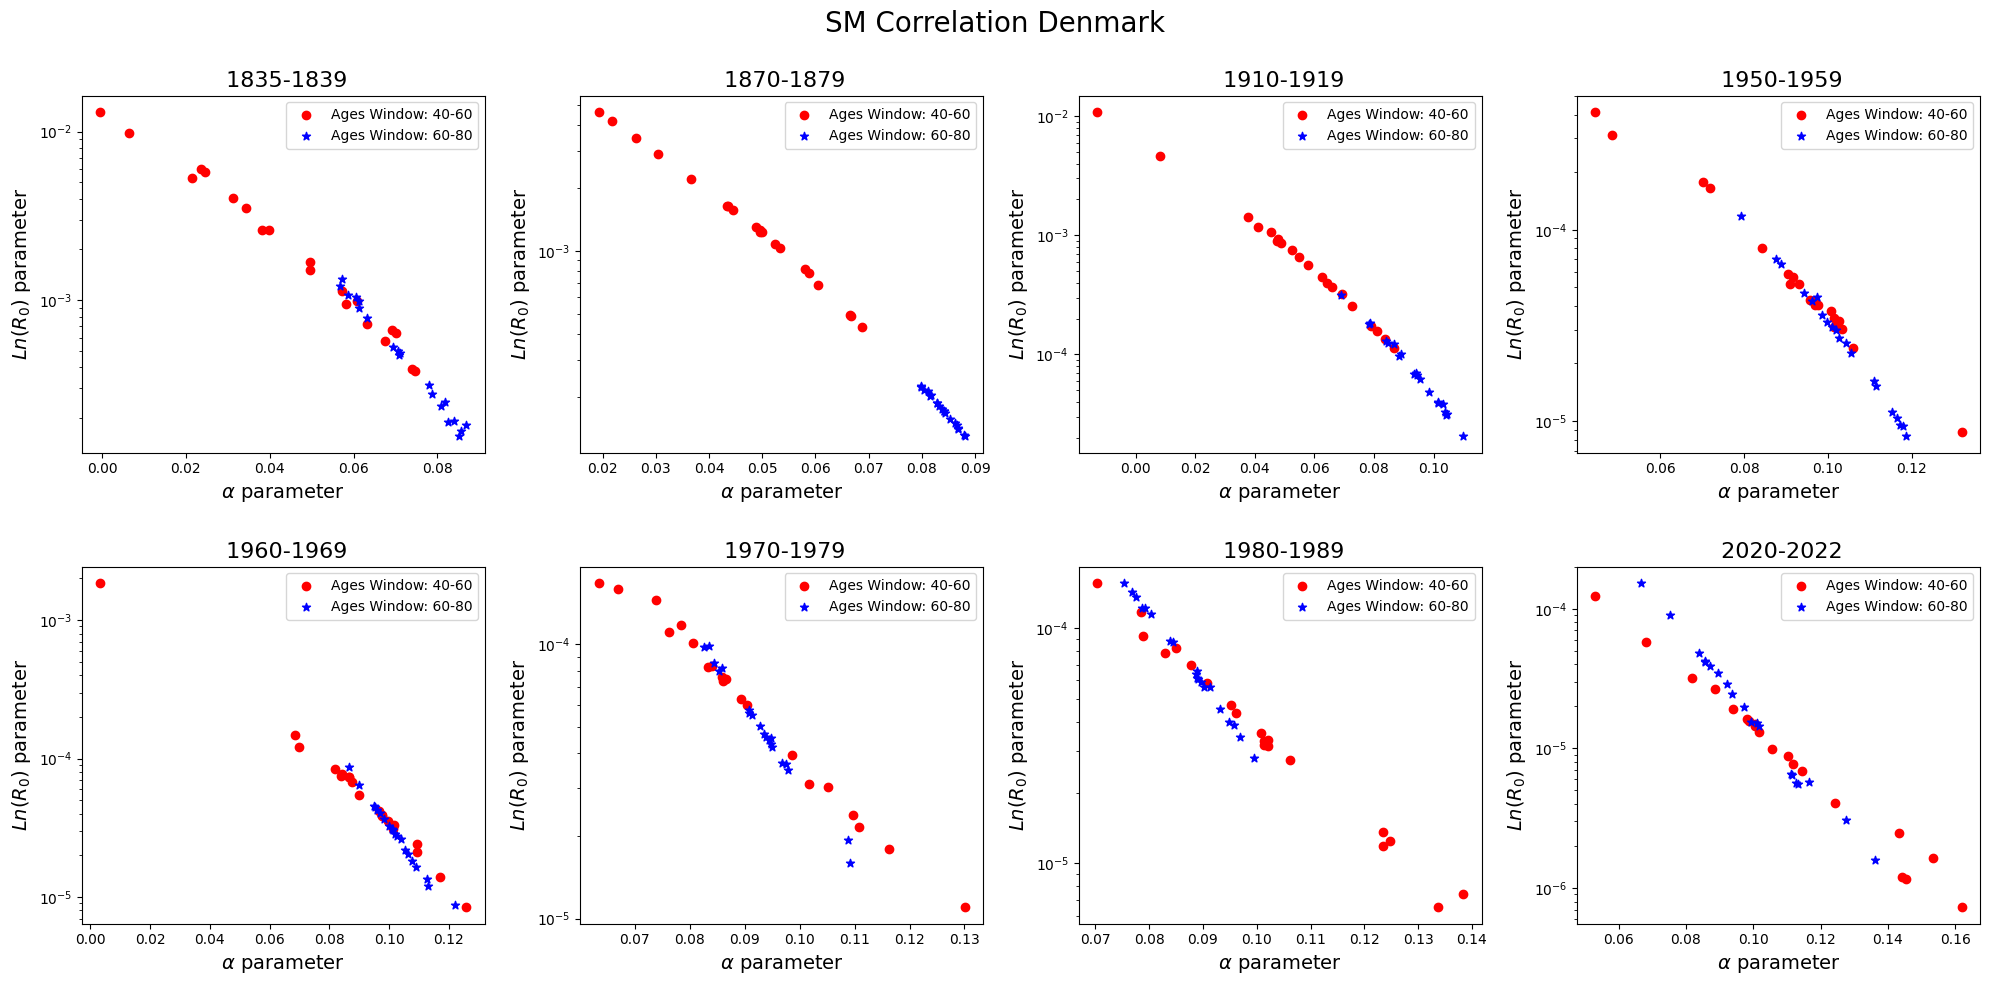

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Creating subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Plotting the data on subplots
fig.suptitle(r"SM Correlation Denmark", fontsize = 20)
contador = 0
valores = [0, 4, 8, 12, 13, 14, 15, -1]
for i in range(0,2):
    for j in range(0,4):
        
        axs[i, j].scatter(betas_gompertz_law_40_60[valores[contador]], R_parameter_gompertz_law_40_60[valores[contador]], color="red",label = "Ages Window: 40-60")
        axs[i, j].scatter(betas_gompertz_law_60_80[valores[contador]], R_parameter_gompertz_law_60_80[valores[contador]], color= "blue", marker='*',label = "Ages Window: 60-80")
        axs[i, j].set_title(f" \n {years_of_interes[valores[contador]]}", fontsize = 16)
        axs[i, j].set_xlabel(r"$\alpha$ parameter", fontsize = 14)
        axs[i, j].set_ylabel(r"$Ln(R_0)$ parameter", fontsize = 14)
        axs[i, j].set_yscale("log")
        axs[i, j].legend()
        contador += 1

plt.tight_layout()
plt.savefig("SM_Correlation_Denmark.jpg", dpi = 1000)
plt.show()

# FIT FIN Finlandia

In [418]:
with open('Mx_1x10/FIN.Mx_1x10.txt', 'r') as file:
    # Lee la primera línea (encabezado) y divídela en una lista
    header = file.readline().strip().split()

    # Inicializa listas vacías para almacenar los datos
    years = []
    ages = []
    females = []
    males = []
    totals = []

    row_count = 0
    for line in file:
        row_count += 1
        if row_count == 1:
            continue
        if row_count == 2:
            continue

        data = line.strip().split()
        years.append((data[0]))

        if data[1] == "110+":
            ages.append(110)
        else:
            ages.append(float(data[1]))
        if data[2] == ".":
            females.append(0)
        else:
            females.append(float(data[2]))
        if data[3] == ".":
            males.append(0)
        else:
            males.append(float(data[3]))
        if data[4] == ".":
            totals.append(0)
        else:
            totals.append(float(data[4]))
years = np.array(years)
ages = np.array(ages)
females = np.array(females)
males = np.array(males)
totals = np.array(totals)


years_of_interes = ["1878-1879", "1880-1889", "1890-1899", "1900-1909","1910-1919", "1920-1929","1930-1939" , "1940-1949","1950-1959", "1960-1969", "1970-1979","1980-1989", "1990-1999", "2000-2009", "2010-2019"]

datos_generales = {}
datos_generales["Ages"] = ages[0:100]
for specific_year in years_of_interes:
    posicion_inicial = np.where(years == specific_year)[0][0]
    death_rate = totals[posicion_inicial:posicion_inicial+100]
    datos_generales[specific_year] = death_rate

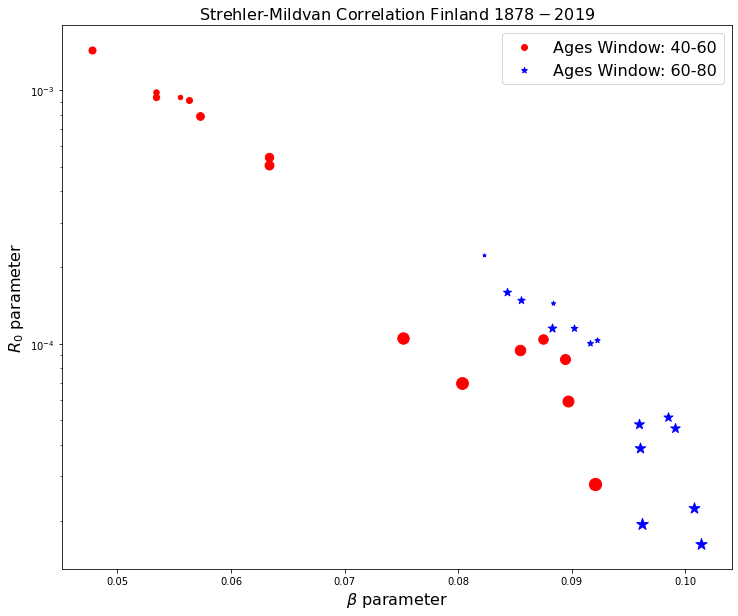

In [419]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.e**(b * x) 

R_parameter_gompertz_law_40_60 = []
R_parameter_gompertz_law_60_80 = []

betas_gompertz_law_40_60 = []
betas_gompertz_law_60_80 = []


for year in years_of_interes:
    edad_40_60 = datos_generales["Ages"][40:60]
    data_40_60 = datos_generales[year][40:60]
    popt_40_60, pcov_40_60 = curve_fit(func, edad_40_60, data_40_60, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_40_60.append(popt_40_60[0])
    betas_gompertz_law_40_60.append(popt_40_60[1])

    edad_60_80 = datos_generales["Ages"][60:80]
    data_60_80 = datos_generales[year][60:80]
    popt_60_80, pcov_60_80 = curve_fit(func, edad_60_80, data_60_80, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_60_80.append(popt_60_80[0])
    betas_gompertz_law_60_80.append(popt_60_80[1])

plt.figure(figsize = (12,10))
plt.title(fr"Strehler-Mildvan Correlation Finland $1878-2019$" , fontsize = 16)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$R_0$ parameter", fontsize = 16)
marker_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]

# Crear un scatter plot con colores diferentes para cada pareja de puntos
for i in range(len(betas_gompertz_law_40_60)):
    plt.scatter(betas_gompertz_law_40_60[i], R_parameter_gompertz_law_40_60[i], color="red", s=marker_sizes[i])
    plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',s=marker_sizes[i])
plt.scatter(betas_gompertz_law_40_60[0], R_parameter_gompertz_law_40_60[0], color="red",label = "Ages Window: 40-60")
plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',label = "Ages Window: 60-80")
plt.yscale("log")
plt.legend(fontsize = 16)
plt.savefig("Strehler_Mildvan_correlation_Fin.jpg", dpi = 500)

# FIT GBRTENW

In [424]:
with open('Mx_1x10/GBRTENW.Mx_1x10.txt', 'r') as file:
    # Lee la primera línea (encabezado) y divídela en una lista
    header = file.readline().strip().split()

    # Inicializa listas vacías para almacenar los datos
    years = []
    ages = []
    females = []
    males = []
    totals = []

    row_count = 0
    for line in file:
        row_count += 1
        if row_count == 1:
            continue
        if row_count == 2:
            continue

        data = line.strip().split()
        years.append((data[0]))

        if data[1] == "110+":
            ages.append(110)
        else:
            ages.append(float(data[1]))
        if data[2] == ".":
            females.append(0)
        else:
            females.append(float(data[2]))
        if data[3] == ".":
            males.append(0)
        else:
            males.append(float(data[3]))
        if data[4] == ".":
            totals.append(0)
        else:
            totals.append(float(data[4]))
years = np.array(years)
ages = np.array(ages)
females = np.array(females)
males = np.array(males)
totals = np.array(totals)


years_of_interes = ["1841-1849", "1850-1859", "1860-1869", "1870-1879", "1880-1889", "1890-1899", "1900-1909","1910-1919", "1920-1929","1930-1939" , "1940-1949","1950-1959", "1960-1969", "1970-1979","1980-1989", "1990-1999", "2000-2009", "2010-2019"]

datos_generales = {}
datos_generales["Ages"] = ages[0:100]
for specific_year in years_of_interes:
    posicion_inicial = np.where(years == specific_year)[0][0]
    death_rate = totals[posicion_inicial:posicion_inicial+100]
    datos_generales[specific_year] = death_rate

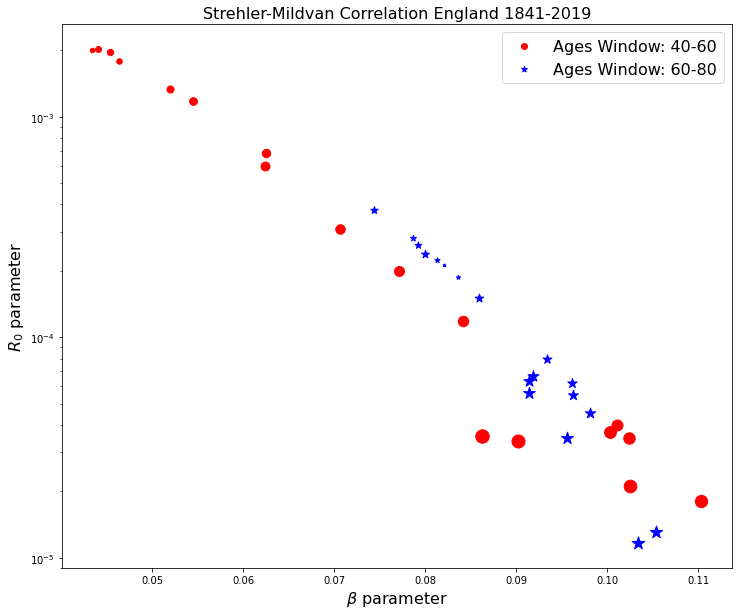

In [425]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.e**(b * x) 

R_parameter_gompertz_law_40_60 = []
R_parameter_gompertz_law_60_80 = []

betas_gompertz_law_40_60 = []
betas_gompertz_law_60_80 = []


for year in years_of_interes:
    edad_40_60 = datos_generales["Ages"][40:60]
    data_40_60 = datos_generales[year][40:60]
    popt_40_60, pcov_40_60 = curve_fit(func, edad_40_60, data_40_60, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_40_60.append(popt_40_60[0])
    betas_gompertz_law_40_60.append(popt_40_60[1])

    edad_60_80 = datos_generales["Ages"][60:80]
    data_60_80 = datos_generales[year][60:80]
    popt_60_80, pcov_60_80 = curve_fit(func, edad_60_80, data_60_80, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_60_80.append(popt_60_80[0])
    betas_gompertz_law_60_80.append(popt_60_80[1])

plt.figure(figsize = (12,10))
plt.title(r"Strehler-Mildvan Correlation England 1841-2019" , fontsize = 16)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$R_0$ parameter", fontsize = 16)
marker_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]

# Crear un scatter plot con colores diferentes para cada pareja de puntos
for i in range(len(betas_gompertz_law_40_60)):
    plt.scatter(betas_gompertz_law_40_60[i], R_parameter_gompertz_law_40_60[i], color="red", s=marker_sizes[i])
    plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',s=marker_sizes[i])
plt.scatter(betas_gompertz_law_40_60[0], R_parameter_gompertz_law_40_60[0], color="red",label = "Ages Window: 40-60")
plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',label = "Ages Window: 60-80")
plt.yscale("log")
plt.legend(fontsize = 16)
plt.savefig("Strehler_Mildvan_correlation_England.jpg", dpi = 500)

# Fit GBR_SCO Scotland

In [429]:
with open('Mx_1x10/GBR_SCO.Mx_1x10.txt', 'r') as file:
    # Lee la primera línea (encabezado) y divídela en una lista
    header = file.readline().strip().split()

    # Inicializa listas vacías para almacenar los datos
    years = []
    ages = []
    females = []
    males = []
    totals = []

    row_count = 0
    for line in file:
        row_count += 1
        if row_count == 1:
            continue
        if row_count == 2:
            continue

        data = line.strip().split()
        years.append((data[0]))

        if data[1] == "110+":
            ages.append(110)
        else:
            ages.append(float(data[1]))
        if data[2] == ".":
            females.append(0)
        else:
            females.append(float(data[2]))
        if data[3] == ".":
            males.append(0)
        else:
            males.append(float(data[3]))
        if data[4] == ".":
            totals.append(0)
        else:
            totals.append(float(data[4]))
years = np.array(years)
ages = np.array(ages)
females = np.array(females)
males = np.array(males)
totals = np.array(totals)


years_of_interes = ["1855-1859", "1860-1869", "1870-1879", "1880-1889", "1890-1899", "1900-1909","1910-1919", "1920-1929","1930-1939" , "1940-1949","1950-1959", "1960-1969", "1970-1979","1980-1989", "1990-1999", "2000-2009", "2010-2019"]

datos_generales = {}
datos_generales["Ages"] = ages[0:100]
for specific_year in years_of_interes:
    posicion_inicial = np.where(years == specific_year)[0][0]
    death_rate = totals[posicion_inicial:posicion_inicial+100]
    datos_generales[specific_year] = death_rate

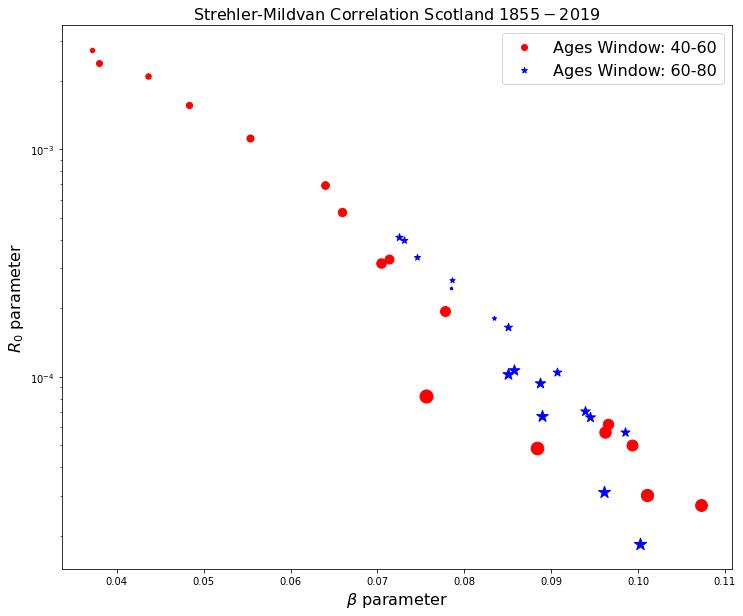

In [430]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.e**(b * x) 

R_parameter_gompertz_law_40_60 = []
R_parameter_gompertz_law_60_80 = []

betas_gompertz_law_40_60 = []
betas_gompertz_law_60_80 = []


for year in years_of_interes:
    edad_40_60 = datos_generales["Ages"][40:60]
    data_40_60 = datos_generales[year][40:60]
    popt_40_60, pcov_40_60 = curve_fit(func, edad_40_60, data_40_60, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_40_60.append(popt_40_60[0])
    betas_gompertz_law_40_60.append(popt_40_60[1])

    edad_60_80 = datos_generales["Ages"][60:80]
    data_60_80 = datos_generales[year][60:80]
    popt_60_80, pcov_60_80 = curve_fit(func, edad_60_80, data_60_80, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_60_80.append(popt_60_80[0])
    betas_gompertz_law_60_80.append(popt_60_80[1])

plt.figure(figsize = (12,10))
plt.title(rf"Strehler-Mildvan Correlation Scotland $1855-2019$" , fontsize = 16)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$R_0$ parameter", fontsize = 16)
marker_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]

# Crear un scatter plot con colores diferentes para cada pareja de puntos
for i in range(len(betas_gompertz_law_40_60)):
    plt.scatter(betas_gompertz_law_40_60[i], R_parameter_gompertz_law_40_60[i], color="red", s=marker_sizes[i])
    plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',s=marker_sizes[i])
plt.scatter(betas_gompertz_law_40_60[0], R_parameter_gompertz_law_40_60[0], color="red",label = "Ages Window: 40-60")
plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',label = "Ages Window: 60-80")
plt.yscale("log")
plt.legend(fontsize = 16)
plt.savefig("Strehler_Mildvan_correlation_Scotland.jpg", dpi = 500)

# Fit ISL Iceland

In [58]:
with open('Mx_1x10/ISL.Mx_1x10.txt', 'r') as file:
    # Lee la primera línea (encabezado) y divídela en una lista
    header = file.readline().strip().split()

    # Inicializa listas vacías para almacenar los datos
    years = []
    ages = []
    females = []
    males = []
    totals = []

    row_count = 0
    for line in file:
        row_count += 1
        if row_count == 1:
            continue
        if row_count == 2:
            continue

        data = line.strip().split()
        years.append((data[0]))

        if data[1] == "110+":
            ages.append(110)
        else:
            ages.append(float(data[1]))
        if data[2] == ".":
            females.append(0)
        else:
            females.append(float(data[2]))
        if data[3] == ".":
            males.append(0)
        else:
            males.append(float(data[3]))
        if data[4] == ".":
            totals.append(0)
        else:
            totals.append(float(data[4]))
years = np.array(years)
ages = np.array(ages)
females = np.array(females)
males = np.array(males)
totals = np.array(totals)


years_of_interes = ["1838-1839", "1840-1849", "1850-1859", "1860-1869", "1870-1879", "1880-1889", "1890-1899", "1900-1909","1910-1919", "1920-1929","1930-1939" , "1940-1949","1950-1959", "1960-1969", "1970-1979","1980-1989", "1990-1999", "2000-2009", "2010-2019", "2020-2021"]

datos_generales = {}
datos_generales["Ages"] = ages[0:100]
for specific_year in years_of_interes:
    posicion_inicial = np.where(years == specific_year)[0][0]
    death_rate = totals[posicion_inicial:posicion_inicial+100]
    datos_generales[specific_year] = death_rate

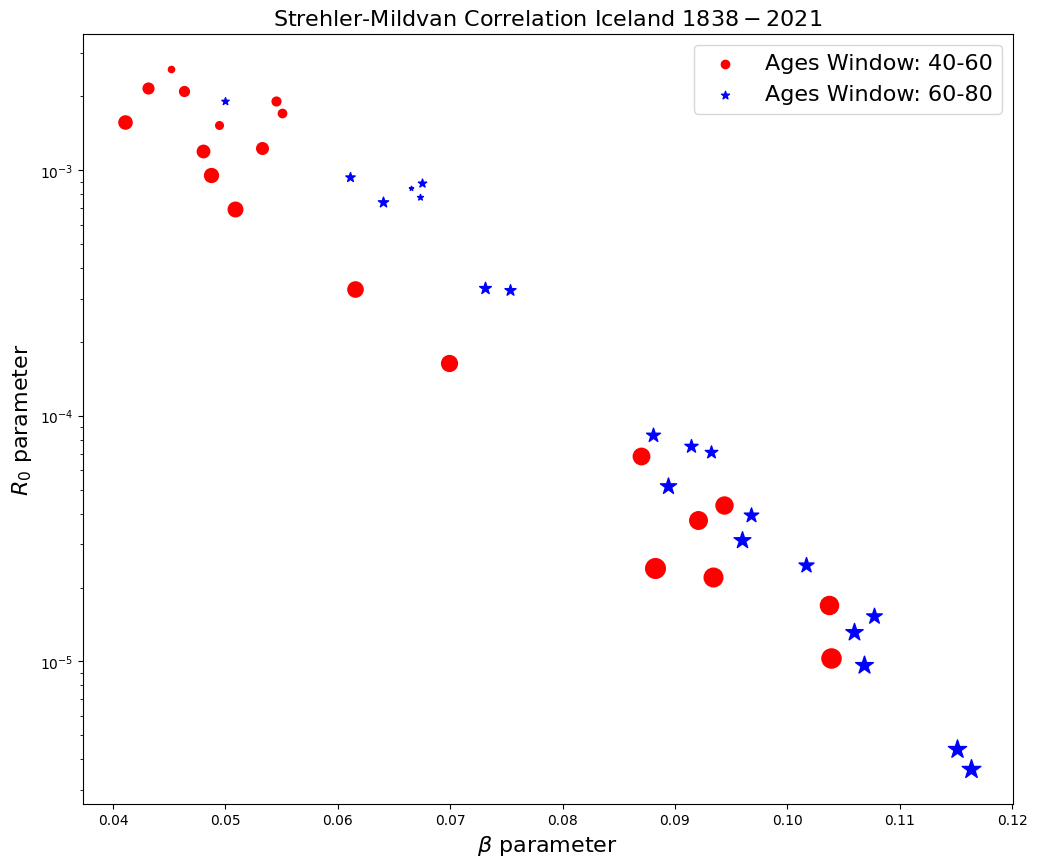

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.e**(b * x) 

R_parameter_gompertz_law_40_60 = []
R_parameter_gompertz_law_60_80 = []

betas_gompertz_law_40_60 = []
betas_gompertz_law_60_80 = []


for year in years_of_interes:
    edad_40_60 = datos_generales["Ages"][40:60]
    data_40_60 = datos_generales[year][40:60]
    popt_40_60, pcov_40_60 = curve_fit(func, edad_40_60, data_40_60, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_40_60.append(popt_40_60[0])
    betas_gompertz_law_40_60.append(popt_40_60[1])

    edad_60_80 = datos_generales["Ages"][60:80]
    data_60_80 = datos_generales[year][60:80]
    popt_60_80, pcov_60_80 = curve_fit(func, edad_60_80, data_60_80, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_60_80.append(popt_60_80[0])
    betas_gompertz_law_60_80.append(popt_60_80[1])

plt.figure(figsize = (12,10))
plt.title(rf"Strehler-Mildvan Correlation Iceland $1838-2021$" , fontsize = 16)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$R_0$ parameter", fontsize = 16)
marker_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230]

# Crear un scatter plot con colores diferentes para cada pareja de puntos
for i in range(len(betas_gompertz_law_40_60)):
    plt.scatter(betas_gompertz_law_40_60[i], R_parameter_gompertz_law_40_60[i], color="red", s=marker_sizes[i])
    plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',s=marker_sizes[i])
plt.scatter(betas_gompertz_law_40_60[0], R_parameter_gompertz_law_40_60[0], color="red",label = "Ages Window: 40-60")
plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',label = "Ages Window: 60-80")
plt.yscale("log")
plt.legend(fontsize = 16)
#plt.savefig("Strehler_Mildvan_correlation_Iceland.jpg", dpi = 500)

In [63]:
R_parameter_gompertz_law_40_60 = []
R_parameter_gompertz_law_60_80 = []

betas_gompertz_law_40_60 = []
betas_gompertz_law_60_80 = []


for year in years_of_interes:
    betas_40_60 = []
    R_values_40_60 = []
    edad_40_60 = datos_generales["Ages"][40:60]
    data_40_60 = datos_generales[year][40:60]

    Cubic_data = CubicSpline(edad_40_60, data_40_60, bc_type='natural')
    edad_40_60 = np.linspace(40,60,100)
    Spline_data_40_60 = Cubic_data(edad_40_60)
    


    derivative_process = dxdt(Spline_data_40_60, edad_40_60, kind="finite_difference", k=1)
    beta_values = derivative_process/Spline_data_40_60
    R_values = Spline_data_40_60/np.e**(beta_values*edad_40_60)
    betas_40_60.append(beta_values)
    R_values_40_60.append(R_values)


    betas_60_80 = []
    R_values_60_80 = []
    edad_60_80 = datos_generales["Ages"][60:80]
    data_60_80 = datos_generales[year][60:80]

    Cubic_data = CubicSpline(edad_60_80, data_60_80, bc_type='natural')
    edad_60_80 = np.linspace(60,80,100)
    Spline_data_60_80 = Cubic_data(edad_60_80)
    
    

    derivative_process = dxdt(Spline_data_60_80, edad_60_80, kind="finite_difference", k=1)
    beta_values = derivative_process/Spline_data_60_80
    R_values = Spline_data_60_80/np.e**(beta_values*edad_60_80)
    betas_60_80.append(beta_values)
    R_values_60_80.append(R_values)


    R_parameter_gompertz_law_40_60.append(R_values_40_60)
    R_parameter_gompertz_law_60_80.append(R_values_60_80)

    betas_gompertz_law_40_60.append(betas_40_60)
    betas_gompertz_law_60_80.append(betas_60_80)

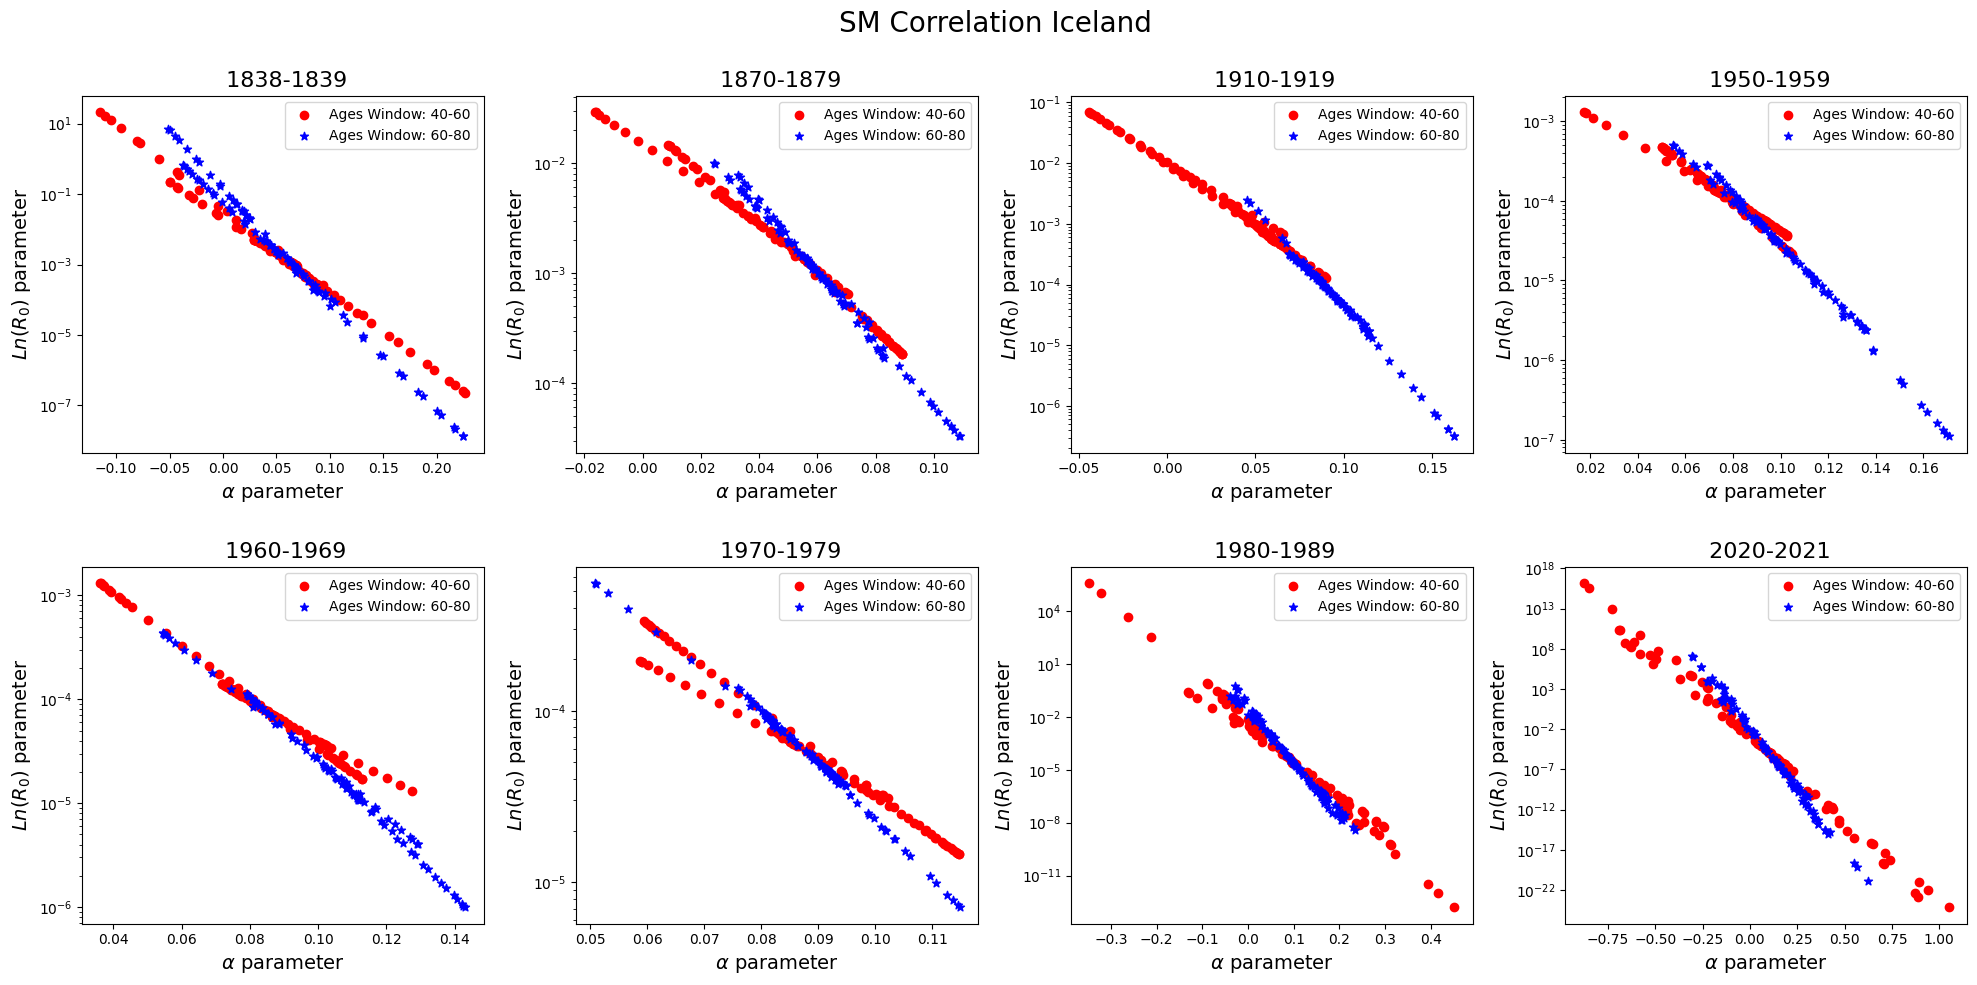

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Creating subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Plotting the data on subplots
fig.suptitle(r"SM Correlation Iceland", fontsize = 20)
contador = 0
valores = [0, 4, 8, 12, 13, 14, 15, -1]
for i in range(0,2):
    for j in range(0,4):
        
        axs[i, j].scatter(betas_gompertz_law_40_60[valores[contador]], R_parameter_gompertz_law_40_60[valores[contador]], color="red",label = "Ages Window: 40-60")
        axs[i, j].scatter(betas_gompertz_law_60_80[valores[contador]], R_parameter_gompertz_law_60_80[valores[contador]], color= "blue", marker='*',label = "Ages Window: 60-80")
        axs[i, j].set_title(f" \n {years_of_interes[valores[contador]]}", fontsize = 16)
        axs[i, j].set_xlabel(r"$\alpha$ parameter", fontsize = 14)
        axs[i, j].set_ylabel(r"$Ln(R_0)$ parameter", fontsize = 14)
        axs[i, j].set_yscale("log")
        axs[i, j].legend()
        contador += 1

plt.tight_layout()
plt.savefig("SM_Correlation_Iceland_CubicSpline.jpg", dpi = 1000)
plt.show()

# Fit NLD Netherlands

In [436]:
with open('Mx_1x10/NLD.Mx_1x10.txt', 'r') as file:
    # Lee la primera línea (encabezado) y divídela en una lista
    header = file.readline().strip().split()

    # Inicializa listas vacías para almacenar los datos
    years = []
    ages = []
    females = []
    males = []
    totals = []

    row_count = 0
    for line in file:
        row_count += 1
        if row_count == 1:
            continue
        if row_count == 2:
            continue

        data = line.strip().split()
        years.append((data[0]))

        if data[1] == "110+":
            ages.append(110)
        else:
            ages.append(float(data[1]))
        if data[2] == ".":
            females.append(0)
        else:
            females.append(float(data[2]))
        if data[3] == ".":
            males.append(0)
        else:
            males.append(float(data[3]))
        if data[4] == ".":
            totals.append(0)
        else:
            totals.append(float(data[4]))
years = np.array(years)
ages = np.array(ages)
females = np.array(females)
males = np.array(males)
totals = np.array(totals)


years_of_interes = [ "1850-1859", "1860-1869", "1870-1879", "1880-1889", "1890-1899", "1900-1909","1910-1919", "1920-1929","1930-1939" , "1940-1949","1950-1959", "1960-1969", "1970-1979","1980-1989", "1990-1999", "2000-2009", "2010-2019"]

datos_generales = {}
datos_generales["Ages"] = ages[0:100]
for specific_year in years_of_interes:
    posicion_inicial = np.where(years == specific_year)[0][0]
    death_rate = totals[posicion_inicial:posicion_inicial+100]
    datos_generales[specific_year] = death_rate

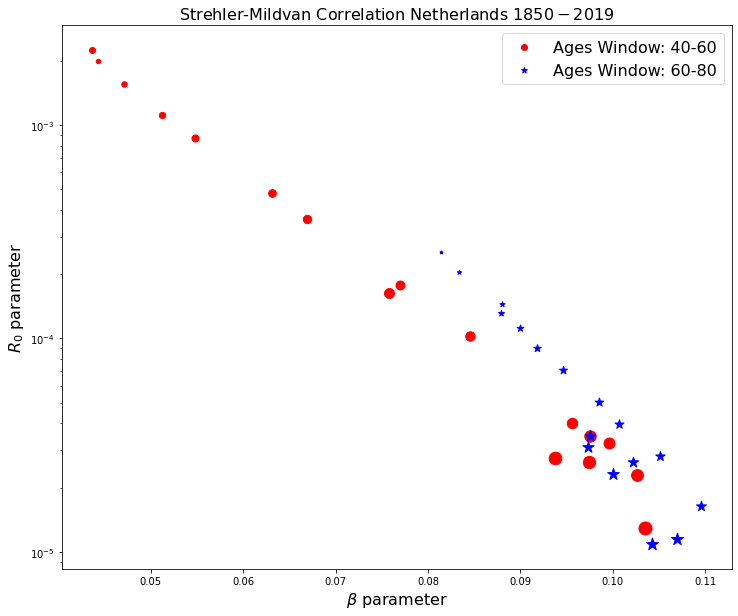

In [437]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.e**(b * x) 

R_parameter_gompertz_law_40_60 = []
R_parameter_gompertz_law_60_80 = []

betas_gompertz_law_40_60 = []
betas_gompertz_law_60_80 = []


for year in years_of_interes:
    edad_40_60 = datos_generales["Ages"][40:60]
    data_40_60 = datos_generales[year][40:60]
    popt_40_60, pcov_40_60 = curve_fit(func, edad_40_60, data_40_60, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_40_60.append(popt_40_60[0])
    betas_gompertz_law_40_60.append(popt_40_60[1])

    edad_60_80 = datos_generales["Ages"][60:80]
    data_60_80 = datos_generales[year][60:80]
    popt_60_80, pcov_60_80 = curve_fit(func, edad_60_80, data_60_80, bounds=(0, [3., 1., 0.5]))
    R_parameter_gompertz_law_60_80.append(popt_60_80[0])
    betas_gompertz_law_60_80.append(popt_60_80[1])

plt.figure(figsize = (12,10))
plt.title(rf"Strehler-Mildvan Correlation Netherlands $1850-2019$" , fontsize = 16)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$R_0$ parameter", fontsize = 16)
marker_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230]

# Crear un scatter plot con colores diferentes para cada pareja de puntos
for i in range(len(betas_gompertz_law_40_60)):
    plt.scatter(betas_gompertz_law_40_60[i], R_parameter_gompertz_law_40_60[i], color="red", s=marker_sizes[i])
    plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',s=marker_sizes[i])
plt.scatter(betas_gompertz_law_40_60[0], R_parameter_gompertz_law_40_60[0], color="red",label = "Ages Window: 40-60")
plt.scatter(betas_gompertz_law_60_80[i], R_parameter_gompertz_law_60_80[i], color= "blue", marker='*',label = "Ages Window: 60-80")
plt.yscale("log")
plt.legend(fontsize = 16)
plt.savefig("Strehler_Mildvan_correlation_Netherlands.jpg", dpi = 500)